# Segmenting and Clustering Neighbourhoods in Toronto

## _Use the Notebook to build the code to scrape the following Wikipedia page, create the  dataframe_

#### import urllib to fetch HTML from url and use BeautifulSoup to extract and explore data through the prettify code

In [333]:
import pandas as pd
import numpy as np
import urllib.request
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)

from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "lxml")

print (soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"5620c61a-4766-477c-816f-d9e1281a16a8","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":948084252,"wgRevisionId":948084252,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toron

### identify wikitable sortable using inspect function in browser

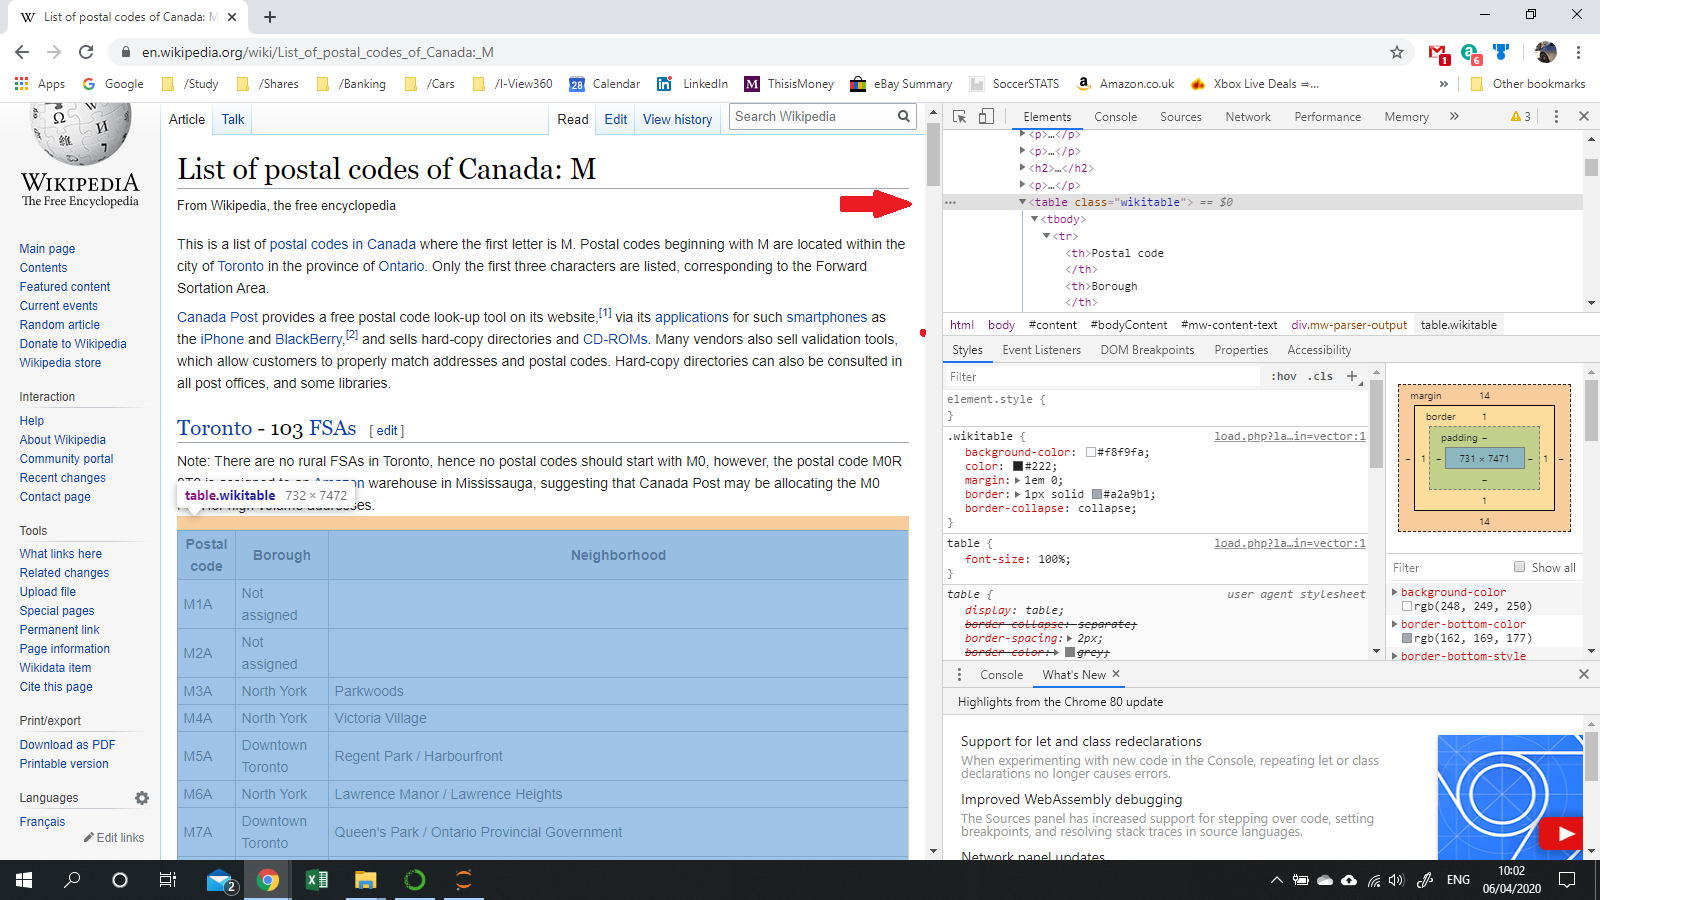

### locate and check using find function and assign as object "right table"

In [334]:
right_table=soup.find('table', class_='wikitable')
right_table

<table class="wikitable">
<tbody><tr>
<th>Postal code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park / Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor / Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park / Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern / Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3B
</td>
<td>North York
</td>
<td>Don Mills
</td></tr>
<tr>
<td>M4B
</td>
<td>East York
<

### create empty lists and intiate loop to extract data (td tags) from the rows (tr tags)  

In [335]:
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

### assign lists to data table, renaming the headers & check output using .head() function

In [336]:
df=pd.DataFrame(A,columns=['Postcode'])
df['Borough']=B
df['Neighbourhood']=C
df.head()

,Postcode,Borough,Neighbourhood
0,M1A\n,Not assigned\n,\n
1,M2A\n,Not assigned\n,\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,Regent Park / Harbourfront\n


### Check shape of dataframe

In [337]:
df.shape

(180, 3)

### ...so far so good, but there are some issues with the data above.
1. I need to remove the /n new line breaks
2. there are entries which are "not assigned" which add no value and need to be dropped

In [338]:
dfclean = df
dfclean = dfclean.replace(r'\n','', regex=True) 
dfclean = dfclean.drop(dfclean.index[dfclean['Borough'] == 'Not assigned']).reset_index(drop = True)
dfclean.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [339]:
dfclean.shape

(103, 3)

### lets check the postcode column for duplicates, as there was mention that the data might have contained duplicate post code values however using the describe method, we can see that all 103 entries are unique.

In [340]:
dfclean.describe()

,Postcode,Borough,Neighbourhood
count,103,103,103
unique,103,10,98
top,M5X,North York,Downsview
freq,1,24,4


### I can only assume that some of the data has since been improved since the task was asked of us.

### <font color=blue>_*Should* the data have had contained duplicate values I would have used the following method to combine them_ <font>

In [341]:
#create a dataframe with some "dummy" data
dfexample = pd.DataFrame({'EXPOSTCODE':['M1A','M2A','M4A','M5A','M6A','M7A','M5A','M8A','M9A'],'Neighbourhood':['EXAMPLE1','EXAMPLE2','EXAMPLE3','EXAMPLE4','EXAMPLE5','EXAMPLE6','EXAMPLE7','EXAMPLE8','EXAMPLE9']})
dfexample

,EXPOSTCODE,Neighbourhood
0,M1A,EXAMPLE1
1,M2A,EXAMPLE2
2,M4A,EXAMPLE3
3,M5A,EXAMPLE4
4,M6A,EXAMPLE5
5,M7A,EXAMPLE6
6,M5A,EXAMPLE7
7,M8A,EXAMPLE8
8,M9A,EXAMPLE9


In [342]:
#quickly explore the data
dfexample.describe()

,EXPOSTCODE,Neighbourhood
count,9,9
unique,8,9
top,M5A,EXAMPLE8
freq,2,1


In [343]:
#we can see from the information above that there are 9 entires in te EXPOSTCODE column set but only 8 unique

#using the following code I will consolidate the neighbourhood data into the duplicate EXPOSTCODE values

dfexample.groupby('EXPOSTCODE')['Neighbourhood'].apply(', '.join).reset_index()

,EXPOSTCODE,Neighbourhood
0,M1A,EXAMPLE1
1,M2A,EXAMPLE2
2,M4A,EXAMPLE3
3,M5A,"EXAMPLE4, EXAMPLE7"
4,M6A,EXAMPLE5
5,M7A,EXAMPLE6
6,M8A,EXAMPLE8
7,M9A,EXAMPLE9


### <font color=blue> Should I have needed to replace any Neighbourhood's which were labeled as "Not Assigned" with data from Borough column I would have used the following code

In [344]:
df2.loc[dfclean['Neighbourhood'] == 'Not assigned', 'Neighbourhood'] = dfclean['Borough']

### Back to the task at hand...

In [345]:
dfclean.shape

(103, 3)

### Downloading the data for the geographical co-ordinates - as I was not really sold on the _"Given that this package can be very unreliable"_ part of the other method

In [346]:
geo_data = pd.read_csv("http://cocl.us/Geospatial_data")

geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Maybe check that my dataframe I created earlier is still available.

In [347]:
dfclean.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


#### ...so far so good

### Lets add the Latitude and Longitude columns from the geo_data dataframe to that of the Borough and Neighbourhood using the Postcode

In [348]:
pdmerge = pd.merge(dfclean, geo_data, on='Postcode')

pdmerge.head()

KeyError: 'Postcode'

## <font color=red>_say whaaat?_ oh, It looks like it cant find the column called 'Postcode'

In [349]:
geo_data.columns

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')

## naturally looks like its called "Postal Code" not "Postcode" - nice one... lets change that.

In [350]:
geo_data.rename(columns={'Postal Code':'Postcode'},inplace=True)
geo_data.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### ... thats better, lets try again

In [351]:
pdmerge = pd.merge(dfclean, geo_data, on='Postcode')

pdmerge.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494


## merge complete!

### lets visualise this in a map using Folium

In [352]:
# I was using a local copy of Jupyter on my notebook and needed to install folium

#!conda install -c conda-forge geopy --yes
#from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium

#print("import complete")

In [353]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [354]:
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=10)


for lat, lng, borough, neighborhood in zip(pdmerge['Latitude'], pdmerge['Longitude'], pdmerge['Borough'], pdmerge['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)  
    
toronto_map

### Logging into Foursquare API

In [355]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [356]:
CLIENT_ID = 'LND32RIPQGS5ADMZUNTHJ3GB4ZYSWQRZRPZSE5OVMUT0UPZL' 
CLIENT_SECRET = '5OASDGHSYF0B45EHZOYTRPESPILXZFQC3PBOLFC4DSTU2XOQ'
VERSION = '20200126'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LND32RIPQGS5ADMZUNTHJ3GB4ZYSWQRZRPZSE5OVMUT0UPZL
CLIENT_SECRET:5OASDGHSYF0B45EHZOYTRPESPILXZFQC3PBOLFC4DSTU2XOQ


In [357]:
#what is the 1st entry in the pdmerge dataset?

pdmerge.loc[0, 'Neighbourhood']

'Parkwoods'

### Fetch Json file for venues in the area of the given location

In [358]:
limit = 100
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,
    VERSION,
    neighborhood_latitude, 
    neighborhood_longitude,
    radius, 
    limit)
url

results = requests.get(url).json()

In [359]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [360]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [361]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


In [362]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [517]:
nearby_venues

,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Variety Store,Food & Drink Shop,43.751974,-79.333114


### Repeat the process for all neighbourhoods

In [518]:
toronto_venues = getNearbyVenues(names=pdmerge['Neighbourhood'],
                                   latitudes=pdmerge['Latitude'],
                                   longitudes=pdmerge['Longitude'])

Parkwoods
Victoria Village
Regent Park / Harbourfront
Lawrence Manor / Lawrence Heights
Queen's Park / Ontario Provincial Government
Islington Avenue
Malvern / Rouge
Don Mills
Parkview Hill / Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale
Rouge Hill / Port Union / Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood
Guildwood / Morningside / West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor / Wilson Heights / Downsview North
Thorncliffe Park
Richmond / Adelaide / King
Dufferin / Dovercourt Village
Scarborough Village
Fairview / Henry Farm / Oriole
Northwood Park / York University
East Toronto
Harbourfront East / Union Station / Toronto Islands
Little Portugal / Trinity
Kennedy Park / Ionview / East Birchmount Park
Bayview Village
Do

#### Lets check the shape and the fomat of the output in a table

In [551]:
print(toronto_venues.shape)
toronto_venues.head()

(2191, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [552]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 270 uniques categories.


In [553]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add Neighbourhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move Neighbourhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [554]:
toronto_onehot.shape

(2191, 271)

In [555]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Alderwood / Long Branch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,Bathurst Manor / Wilson Heights / Downsview North,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.050000,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Bedford Park / Lawrence Manor East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Willowdale / Newtonbrook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
90,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
91,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0
92,York Mills / Silver Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### print each neighborhood along with the top 5 most common venues

In [556]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Clothing Store  0.25
1  Latin American Restaurant  0.25
2             Breakfast Spot  0.25
3                     Lounge  0.25
4              Movie Theater  0.00


----Alderwood / Long Branch----
            venue  freq
0     Pizza Place  0.25
1        Pharmacy  0.12
2    Skating Rink  0.12
3  Sandwich Place  0.12
4             Pub  0.12


----Bathurst Manor / Wilson Heights / Downsview North----
                       venue  freq
0                       Bank  0.10
1                Coffee Shop  0.10
2              Shopping Mall  0.05
3                       Park  0.05
4  Middle Eastern Restaurant  0.05


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.25
1                 Bank  0.25
2                 Café  0.25
3   Chinese Restaurant  0.25
4    Accessories Store  0.00


----Bedford Park / Lawrence Manor East----
                venue  freq
0         Pizza Place  0.08
1         Coffee Shop  

4               Men's Store   0.0


----Milliken / Agincourt North / Steeles East / L'Amoreaux East----
                venue  freq
0          Playground   0.5
1                Park   0.5
2   Accessories Store   0.0
3  Miscellaneous Shop   0.0
4               Motel   0.0


----Mimico NW / The Queensway West / South of Bloor / Kingsway Park South West / Royal York South West----
                  venue  freq
0           Social Club  0.07
1                Bakery  0.07
2        Discount Store  0.07
3        Sandwich Place  0.07
4  Fast Food Restaurant  0.07


----Moore Park / Summerhill East----
                 venue  freq
0           Playground   1.0
1    Accessories Store   0.0
2   Miscellaneous Shop   0.0
3                Motel   0.0
4  Moroccan Restaurant   0.0


----New Toronto / Mimico South / Humber Bay Shores----
                venue  freq
0         Pizza Place  0.08
1      Rental Service  0.08
2            Pharmacy  0.08
3  Mexican Restaurant  0.08
4        Liquor Store  0.08



In [557]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### display the top 10 venues for each neighborhood.

In [558]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Breakfast Spot,Latin American Restaurant,Clothing Store,Yoga Studio,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
1,Alderwood / Long Branch,Pizza Place,Gym,Skating Rink,Pharmacy,Coffee Shop,Pub,Sandwich Place,Dog Run,Dim Sum Restaurant,Diner
2,Bathurst Manor / Wilson Heights / Downsview North,Coffee Shop,Bank,Shopping Mall,Pizza Place,Deli / Bodega,Sushi Restaurant,Middle Eastern Restaurant,Ice Cream Shop,Restaurant,Diner
3,Bayview Village,Café,Bank,Japanese Restaurant,Chinese Restaurant,Yoga Studio,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
4,Bedford Park / Lawrence Manor East,Sandwich Place,Italian Restaurant,Restaurant,Coffee Shop,Pizza Place,Pub,Café,Sushi Restaurant,Butcher,Japanese Restaurant


### Clustering the data

In [581]:
# set number of clusters
kclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 3, 3, 3, 3, 3, 3, 3, 3])

In [560]:
neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Breakfast Spot,Latin American Restaurant,Clothing Store,Yoga Studio,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
1,Alderwood / Long Branch,Pizza Place,Gym,Skating Rink,Pharmacy,Coffee Shop,Pub,Sandwich Place,Dog Run,Dim Sum Restaurant,Diner
2,Bathurst Manor / Wilson Heights / Downsview North,Coffee Shop,Bank,Shopping Mall,Pizza Place,Deli / Bodega,Sushi Restaurant,Middle Eastern Restaurant,Ice Cream Shop,Restaurant,Diner
3,Bayview Village,Café,Bank,Japanese Restaurant,Chinese Restaurant,Yoga Studio,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
4,Bedford Park / Lawrence Manor East,Sandwich Place,Italian Restaurant,Restaurant,Coffee Shop,Pizza Place,Pub,Café,Sushi Restaurant,Butcher,Japanese Restaurant


In [561]:
neighborhoods_venues_sorted.columns

Index(['Neighbourhood', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [562]:
pdmerge.columns

Index(['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude'], dtype='object')

In [563]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = pdmerge

#merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = pdmerge.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,4.0,Park,Food & Drink Shop,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,3.0,Hockey Arena,Coffee Shop,Intersection,Portuguese Restaurant,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636,3.0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Restaurant,Café,Theater,Mexican Restaurant,Yoga Studio
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763,3.0,Clothing Store,Accessories Store,Gift Shop,Boutique,Shoe Store,Miscellaneous Shop,Furniture / Home Store,Event Space,Vietnamese Restaurant,Coffee Shop
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494,3.0,Coffee Shop,Diner,Yoga Studio,Arts & Crafts Store,Burger Joint,Burrito Place,Boutique,Juice Bar,Café,Beer Bar


In [564]:
print(toronto_merged.dtypes)

Postcode                   object
Borough                    object
Neighbourhood              object
Latitude                  float64
Longitude                 float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object


#### Whilst following the labs and trying to map the results I was getting and error, the intial error was about the datatype so i tried to cast this to the required int format, but I then got an NaN error, so some of my data must have contained str or perhaps blank values, so I used the dropna() formula to remove these. Comparing this dataset with the original merged data, I discovered that 4 rows and 1 column had been removed

In [565]:
Toronto_final = toronto_merged.drop('Postcode', axis=1)
Toronto_final = Toronto_final.dropna()
Toronto_final.reset_index(drop=True)
Toronto_final.shape

(99, 15)

In [566]:
Toronto_final.head()

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Parkwoods,43.753259,-79.329656,4.0,Park,Food & Drink Shop,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
1,North York,Victoria Village,43.725882,-79.315572,3.0,Hockey Arena,Coffee Shop,Intersection,Portuguese Restaurant,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
2,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636,3.0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Restaurant,Café,Theater,Mexican Restaurant,Yoga Studio
3,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763,3.0,Clothing Store,Accessories Store,Gift Shop,Boutique,Shoe Store,Miscellaneous Shop,Furniture / Home Store,Event Space,Vietnamese Restaurant,Coffee Shop
4,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494,3.0,Coffee Shop,Diner,Yoga Studio,Arts & Crafts Store,Burger Joint,Burrito Place,Boutique,Juice Bar,Café,Beer Bar


In [567]:
toronto_merged.shape

(103, 16)

In [569]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_final['Latitude'], Toronto_final['Longitude'],Toronto_final['Neighbourhood'], Toronto_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [572]:
Toronto_final.loc[Toronto_final['Cluster Labels'] == 0, Toronto_final.columns[[1] + list(range(5, Toronto_final.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Scarborough Village,Playground,Convenience Store,Yoga Studio,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
83,Moore Park / Summerhill East,Playground,Yoga Studio,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
85,Milliken / Agincourt North / Steeles East / L'...,Park,Playground,Yoga Studio,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop


#### _3 Neighbourhoods make up my first cluster of which playgrounds and Yoga Studios are amongst the most common venues_

In [579]:
Toronto_final.loc[Toronto_final['Cluster Labels'] == 1, Toronto_final.columns[[1] + list(range(5, Toronto_final.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Parkview Hill / Woodbine Gardens,Pizza Place,Pharmacy,Athletics & Sports,Gastropub,Intersection,Fast Food Restaurant,Pet Store,Bus Line,Bank,Gym / Fitness Center
50,Humber Summit,Pizza Place,Empanada Restaurant,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
63,Runnymede / The Junction North,Pizza Place,Bus Line,Convenience Store,Brewery,Drugstore,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant
70,Westmount,Pizza Place,Discount Store,Coffee Shop,Sandwich Place,Intersection,Chinese Restaurant,Yoga Studio,Dog Run,Dim Sum Restaurant,Diner
77,Kingsview Village / St. Phillips / Martin Grov...,Pizza Place,Bus Line,Sandwich Place,Mobile Phone Shop,Yoga Studio,Doner Restaurant,Discount Store,Distribution Center,Dog Run,Donut Shop
82,Clarks Corners / Tam O'Shanter / Sullivan,Pharmacy,Pizza Place,Fried Chicken Joint,Fast Food Restaurant,Italian Restaurant,Thai Restaurant,Chinese Restaurant,Gas Station,Noodle House,Shopping Mall
89,South Steeles / Silverstone / Humbergate / Jam...,Grocery Store,Beer Store,Fried Chicken Joint,Fast Food Restaurant,Pizza Place,Sandwich Place,Pharmacy,Airport Terminal,Colombian Restaurant,Falafel Restaurant
93,Alderwood / Long Branch,Pizza Place,Gym,Skating Rink,Pharmacy,Coffee Shop,Pub,Sandwich Place,Dog Run,Dim Sum Restaurant,Diner


#### _There are 8 venues in the 2nd cluster, with Pizza Places being the 1st most common venue in this cluster_

In [575]:
Toronto_final.loc[Toronto_final['Cluster Labels'] == 2, Toronto_final.columns[[1] + list(range(5, Toronto_final.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,Humberlea / Emery,Construction & Landscaping,Baseball Field,Yoga Studio,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
101,Old Mill South / King's Mill Park / Sunnylea /...,Baseball Field,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Fast Food Restaurant


#### _The 3rd cluster has a high frequency of Baseball and Yoga Studio's_

In [576]:
Toronto_final.loc[Toronto_final['Cluster Labels'] == 3, Toronto_final.columns[[1] + list(range(5, Toronto_final.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,Hockey Arena,Coffee Shop,Intersection,Portuguese Restaurant,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
2,Regent Park / Harbourfront,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Restaurant,Café,Theater,Mexican Restaurant,Yoga Studio
3,Lawrence Manor / Lawrence Heights,Clothing Store,Accessories Store,Gift Shop,Boutique,Shoe Store,Miscellaneous Shop,Furniture / Home Store,Event Space,Vietnamese Restaurant,Coffee Shop
4,Queen's Park / Ontario Provincial Government,Coffee Shop,Diner,Yoga Studio,Arts & Crafts Store,Burger Joint,Burrito Place,Boutique,Juice Bar,Café,Beer Bar
6,Malvern / Rouge,Fast Food Restaurant,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Yoga Studio,Dim Sum Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
96,St. James Town / Cabbagetown,Coffee Shop,Pizza Place,Café,Italian Restaurant,Restaurant,Convenience Store,Bakery,Pharmacy,Pub,Park
97,First Canadian Place / Underground city,Coffee Shop,Café,Restaurant,Seafood Restaurant,Hotel,Gastropub,Steakhouse,Gym,American Restaurant,Japanese Restaurant
99,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Restaurant,Sushi Restaurant,Yoga Studio,Café,Pub,Burger Joint,Hotel
100,Business reply mail Processing CentrE,Light Rail Station,Yoga Studio,Garden,Skate Park,Smoke Shop,Spa,Farmers Market,Fast Food Restaurant,Burrito Place,Restaurant


#### _My 4th cluster is the biggest cluster at 76 rows, looking at the data - coffee shops appear to be the most common venue which makes sense; However there is little obvious similarity across the other venues, one potental solution would be to increase the number of clusters and isolate these neighbourhoods / extract this data and isolate for further analysis._

In [577]:
Toronto_final.loc[Toronto_final['Cluster Labels'] == 4, Toronto_final.columns[[1] + list(range(5, Toronto_final.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,Park,Food & Drink Shop,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
21,Caledonia-Fairbanks,Park,Women's Store,Pool,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
35,East Toronto,Park,Metro Station,Convenience Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
52,Willowdale / Newtonbrook,Park,Yoga Studio,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
61,Lawrence Park,Park,Bus Line,Swim School,Yoga Studio,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
66,York Mills West,Park,Bank,Convenience Store,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
91,Rosedale,Park,Trail,Playground,Yoga Studio,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
98,The Kingsway / Montgomery Road / Old Mill North,Park,Pool,River,Yoga Studio,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center


#### _The 5th Cluster in the set al share the same single most common attribute - Parks. Yoga Studio's again appear to be commonplace_

In [578]:
Toronto_final.loc[Toronto_final['Cluster Labels'] == 5, Toronto_final.columns[[1] + list(range(5, Toronto_final.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Woburn,Coffee Shop,Korean Restaurant,Yoga Studio,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
34,Northwood Park / York University,Massage Studio,Bar,Caribbean Restaurant,Coffee Shop,Yoga Studio,Drugstore,Distribution Center,Dog Run,Doner Restaurant,Donut Shop


#### _Finally the last cluster (6), a small cluster of only two neighbourhoods, they could contain few venues overall_

## <font color=red> Thank's for reviewing my work!
### - Ed